# Итоговая работа


Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(**driver_response**).


Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost


# 1. Загрузка данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('taxi.csv')
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


# 2. Описание набора данных.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


In [4]:
data.describe(include='all')

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Economy,private,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48335,91207,NaN
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,NaN,NaN,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,NaN,NaN,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,NaN,NaN,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,NaN,NaN,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,NaN,NaN,1.000000


In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(data)
# profile = pandas_profiling.ProfileReport(data)
# profile.to_file(output_file="PandasProfiling.html")

## 2.1. Предварительное описание набора данных

* Кол-во строк 100 000.   
* Всего 14 признаков. Из них, предварительно: 9 числовых, 2 категориальных, 1 булевый и 2 непонятных (Rejected)


Предупреждения (Warnings)

* weekday_key -  14.4% нулевых значений
* hour_key has 6646 / 6.6% нулевых значений
* driver_latitude is highly skewed (γ1 = -26.369) Сильно скошен
* driver_longitude is highly correlated with driver_latitude (ρ = 0.9862) Сильная корреляция.
* origin_order_latitude is highly skewed (γ1 = -80.541) Сильно скошен  
* origin_order_longitude is highly skewed (γ1 = -72.689) Сильно скошен  
* distance_km is highly skewed (γ1 = 65.397) Сильно скошен  
* duration_min is highly correlated with distance_km (ρ = 0.97703) Высокая корреляция.

Оценка:
* Рассмотреть пропуски в признаках weekday_key, hour_key.
* Скос в координатах нормально, т.к. место одно и то же.
* Корреляция между duration_min и distance_km - обоснованно, т.к. действительно есть зависимость. Можно оставить 1 из показателей.

## 2.2.Разберем каждый показатель отдельно. 

### 2.2.1. offer_gk, driver_gk и order_gk

In [ ]:
# Проверим распределение
data['offer_gk'].hist()

In [ ]:
# Посмотрим из каких значений он состоит
print(data['offer_gk'].nunique(), data['offer_gk'].count())

**Результат 2.2.1.**  
Скорее всего это ID заказа, т.е. не числовое значение. Промежуточно, можно убрать из расчетов.  
Предполагаю, что признаки **driver_gk** и **order_gk** являются аналогичными.

### 2.2.2.  **weekday_key**

Профайлинг показывает, что **weekday_key** имеет 14.4% нулевых значений. Скорее всего обозначение 0 - Воскресенье и т.д.  (0-6)

In [ ]:
# Проверим распределение
data['weekday_key'].hist()

Данные дня недели - категориальные

### 2.2.3.  **hour_key**
Номер часа, может понадобится для группировки в временные отрезки и т.д. Нулевые значения, это просто 12 часов ночи

In [ ]:
# Проверим распределение
data['hour_key'].hist()

Предположение: наиболее часто берут такси вечером и ночью, что логично.

### 2.2.4.  **Координаты водителя и заказа**
driver_latitude	  
driver_longitude	  
origin_order_latitude  	
origin_order_longitude  


На данном этапе не вижу, зачем требуются данные признаки для задачи.  
Предположения: 
1. Вычислить районы и локации (зачем?)
2. Определить расстояние между водителем и заказом (зачем, т.к. есть параметр расстояние. Как? вроде есть библиотека)

### 2.2.5. **distance_km, duration_min**  
Большое кол-во значений (более четверти) -1. Судя по всему это пропуски  
Около четверти значений без указания расстояния. 
Так же видно, что duration_min коррелирует с данным признаком.

In [ ]:
# Посмотрим распределение значений без -1
data.query('distance_km != -1')[['distance_km', 'duration_min']].hist(figsize = (15,3))
# data.query('distance_km != -1')[['distance_km']].hist()

### 2.2.6. offer_class_group

In [ ]:
data['offer_class_group'].unique()

In [ ]:
sns.countplot(x='offer_class_group', data=data)
plt.xticks(rotation=90)

In [ ]:
# Посмотрим кол-во лотов в каждом районе
data['offer_class_group'].value_counts()

**Результат 2.2.5.**  
Категориальный признак. Можно использовать Label Encoding.

### 2.2.7. ride_type_desc

In [ ]:
# Преобразование категориальной переменной 'ride_type_desc'
data['ride_type_desc'].unique()

In [ ]:
sns.countplot(x='ride_type_desc', data=data)
plt.xticks(rotation=90)

In [ ]:
# Посмотрим кол-во лотов в каждом районе
data['ride_type_desc'].value_counts()

In [ ]:
data[(data['ride_type_desc'] == 'affiliate') | (data['ride_type_desc'] == 'SMB')].count()

**Результат 2.2.7.**  
Категориальный признак. Можно использовать Label Encoding.  
Тип поездки: private, business, affiliate, SMB  
260 строк из 100 000 - можно удалить. Пока оставляем.

# 3. Выявление пропусков и их обработка.

## 3.1. Пропуски одновременно в координатах, расстоянии и времени поездки.

In [ ]:
data.query('driver_latitude == -1 & distance_km == -1')

В данном случае, предпологаю, это ошибка в заполнении данных. Если данные получались автоматически, то ошибка gps (как вариант)
Если вручную, то пропуск в заполнении.
Решение - удаление 122 элементов из 100 тыс.

In [ ]:
# data_03 - датафрейм в разделе 03. Будет формироваться по ходу обработки пропусков.
# Удалим из датафрейма строки, где одновременно отсутствуют и координаты и расстояние
data_03_index = data.query('driver_latitude == -1 & distance_km == -1').index
data_03 = data[~data.index.isin(data_03_index)]

In [ ]:
data_03

## 3.2. Пропуски в расстоянии distance_km.

In [ ]:
data_03['distance_km'].median()

In [ ]:
data_03[data_03['distance_km'] == -1]

In [ ]:
# Заменяем пропуски на медиану
# data_new2[data_new2['distance_km'] == -1]['distance_km']
data_03['distance_km'] = data_03['distance_km'].replace(-1, data_03['distance_km'].median())

In [ ]:
# Проверим, остались ли еще пропуски
data_03[data_03['distance_km'] == -1]['distance_km']

In [ ]:
data_03.head()

# 4. Определение зависимостей

По профайлингу корреляция отсутствует, за исключением distance_km  и duration_min
Построим матрицу только с учетом числовых значений.

In [ ]:
data_04 = data_03[['distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc', 'driver_response']]
data_04.head()

In [ ]:
sns.pairplot(data_04)

In [ ]:
correlation_matrix = data_04.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

**Результат 4.**  
Повторяется предыдущий результат:   
Корреляция между duration_min и distance_km - обоснованно, т.к. действительно есть зависимость.  
По остальным признакам явной корреляции не выявлено 

In [ ]:
# Удалим duration_min
data_04 = data_03.drop(['duration_min'], axis=1)

In [ ]:
data_04.head()

# 5. Преобразование категориальных признаков.

## 5.1. Преобразование offer_class_group

In [ ]:
offer_class_group = data_04['offer_class_group'].get_values().reshape(-1, 1)

In [ ]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(offer_class_group)
label_result = label_encoder.transform(offer_class_group)
label_result

In [ ]:
offer_class_group

In [ ]:
for n, vect in zip(offer_class_group[:10], label_result[:10]):
    print(n, '!!!!', vect)

In [ ]:
pd.DataFrame(label_result)[:10]

In [ ]:
offer_class_group_df = pd.DataFrame(label_result)
offer_class_group_df.index = data_04.index
offer_class_group_df.columns = ['offer_class_group_new']

In [ ]:
offer_class_group_df

In [ ]:
data_51 = pd.concat([data_04, offer_class_group_df], axis=1)
data_51 = data_51.drop(['offer_class_group'], axis=1)
data_51.head(5)

## 5.2. Преобразование ride_type_desc

In [ ]:
ride_type_desc = data_51['ride_type_desc'].get_values().reshape(-1, 1)

In [ ]:
# Label encoding
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(ride_type_desc)
label_result = label_encoder.transform(ride_type_desc)
label_result

In [ ]:
ride_type_desc

In [ ]:
for n, vect in zip(ride_type_desc[:10], label_result[:10]):
    print(n, '!!!!', vect)

In [ ]:
pd.DataFrame(label_result)[:10]

In [ ]:
ride_type_desc_df = pd.DataFrame(label_result)
ride_type_desc_df.index = data_51.index
ride_type_desc_df.columns = ['ride_type_desc_new']

In [ ]:
ride_type_desc_df

In [ ]:
data_52 = pd.concat([data_51, ride_type_desc_df], axis=1)
data_52 = data_52.drop(['ride_type_desc'], axis=1)
data_52.head(5)

# 6.Преобразование координат

Заменим координаты водителя и заказчика на расстояние до заказчика, это позволит ввести новый признак и определить на каком расстоянии водитель соглашается ехать. 

Расстояние будем вычислять по формуле **Haversine**  
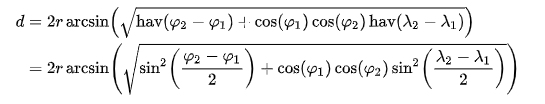

In [ ]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
haversine(55.805342, 37.515023, 55.819329, 37.466398)

In [ ]:
# Проставляем значения столбцов в формулу
haversine_df = []
for element in data_52.index:
    haversine_df.append(haversine(data_52['driver_latitude'][element],
                                  data_52['driver_longitude'][element],
                                  data_52['origin_order_latitude'][element],
                                  data_52['origin_order_longitude'][element]))


In [ ]:
data_06 = data_52
data_06['distance'] = haversine_df

In [ ]:
data_06 = data_06.drop(['driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1)

In [ ]:
data_06.head()

# 7. Рассчитаем модель

## 7.1. Вариант модели логистическая регрессия.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

In [ ]:
X71 = data_06[['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y71 = data_06['driver_response']

In [ ]:
X71[:5]

In [ ]:
y71[:5]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X71,y71,test_size = 0.3,random_state = 3)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
print('Точность предсказания модели: ', accuracy)
parameters = model.coef_
print('slope:', model.coef_)

**Результат 7.1.**  
Точность модели невысокая, продолжим дальше

## 7.2. Вариант модели случайный лес.

In [ ]:
X72 = data_06[['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y72 = data_06['driver_response']

In [ ]:
X72[:5]

In [ ]:
y72[:5]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X72,y72,test_size = 0.3,random_state = 3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X72, y72 = make_classification(n_samples=1000, n_features=9,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X72, y72)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X72, y72))

**Результат 7.2.**  
Точность модели хорошая, попробуем еще.

## 7.3. Вариант модели случайный лес. Уберем индентификаторы.

In [ ]:
X73 = data_06[['weekday_key', 'hour_key', 'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y73 = data_06['driver_response']

In [ ]:
X73[:5]

In [ ]:
y73[:5]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X73,y73,test_size = 0.3,random_state = 3)

In [ ]:
X73, y73 = make_classification(n_samples=1000, n_features=6,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X73, y73)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X73, y73))

**Результат 7.3.**  
Точность модели хорошая, но есть сомнения в часе дня.

## 7.4. Вариант модели случайный лес. Уберем час дня

In [ ]:
X74 = data_06[['weekday_key', 'distance_km', 'offer_class_group_new',
       'ride_type_desc_new', 'distance']]
y74 = data_06['driver_response']

X_train,X_test,y_train,y_test = train_test_split(X74,y74,test_size = 0.3,random_state = 3)

X74, y74 = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X74, y74)  
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

print('Значимость признаков: ',clf.feature_importances_)
print('Точность модели:', clf.score(X74, y74))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

**Результат 7.4.**  
Точность модели снизилась. За рабочую выбираем модель 7.2. или 7.3.